# Introdução



Meu objetivo é criar um modelo que crie cluster de clientes com base em suas características. Para tal, utilizarei o algoritmo K-Means para o agrupamento e o método Elbow para determinar o número de clusters. Para isso, eu utilizarei o conceito de RFM (Recency, Frequency, Monetary) para criar as variáveis que serão utilizadas no modelo. 

RFM é um modelo de análise de clientes que utiliza três variáveis para classificar os clientes de acordo com seu comportamento de compra. A variável Recency (R) mede a o quão recente foi a compra dos clientes, a variável Frequency (F) mede a frequência de compra dos clientes e a variável Monetary (M) mede o valor total gasto pelos clientes.

# Importando os Dados e Bibliotecas necessárias

In [1]:
import pandas as pd
from utils import import_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from yellowbrick.cluster.elbow import kelbow_visualizer
import warnings
warnings.filterwarnings('ignore')


#plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.sans-serif"] = ["Arial"]
#plt.rcParams['font.family'] = 'Arial'

In [2]:
data_dict = import_data()

for key, value in data_dict.items():
    print(key)
    display(value.head())
    print('-' * 200, '\n')

Customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Order_Items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_cost
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Order_Payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Order_Reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,reviews_reponse_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_purchase_to_approved_time,order_delivered_carrier_date,order_delivered_customer_date,order_observed_delivery_time,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,0 days 00:10:42,2017-10-04 19:55:00,2017-10-10 21:25:13,8 days 10:28:40,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,1 days 06:42:50,2018-07-26 14:31:00,2018-08-07 15:27:45,13 days 18:46:08,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,0 days 00:16:34,2018-08-08 13:50:00,2018-08-17 18:06:29,9 days 09:27:40,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,0 days 00:17:53,2017-11-22 13:39:59,2017-12-02 00:28:42,13 days 05:00:36,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,0 days 01:01:50,2018-02-14 19:46:34,2018-02-16 18:17:02,2 days 20:58:23,2018-02-26


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 



# Preparando os Dados

In [3]:
#  Importando os dados que serão necessários para a construção do modelo
data = (
    pd.merge(
        left=data_dict['Customers'],
        right=data_dict['Orders'],
        on='customer_id',
        how='inner'
    ).merge(
        right=data_dict['Order_Payments'],
        on='order_id',
        how='inner'
    )
    [[
        'customer_unique_id',
        'order_purchase_timestamp',
        'payment_value'
    ]]
)


data.head()

,customer_unique_id,order_purchase_timestamp,payment_value
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,157.73
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,173.30
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,252.25


In [4]:
print(f"""
Quantidade de consumidores unicos : {data.customer_unique_id.unique().shape[0]}
Quantidade de consumidores não unicos : {data.customer_unique_id.shape[0] - data.customer_unique_id.unique().shape[0]}
Total de Consumidores: {data.customer_unique_id.shape[0]}
      """)




Quantidade de consumidores unicos : 96074
Quantidade de consumidores não unicos : 7789
Total de Consumidores: 103863
      


In [5]:
def create_rfm_dataframe(data: pd.DataFrame):
    #  Nos metadados do dataset, a data final é 31/12/2018
    last_dataset_day = pd.to_datetime('31/12/2018', format='%d/%m/%Y')
    
    df_monetary = (
                    data
                    [['customer_unique_id', 'payment_value']]
                    .groupby('customer_unique_id')
                    .sum()
                    .rename(columns={'payment_value': 'Monetary'})
                    .reset_index()
                )
    df_recency = (
                    data
                    [['customer_unique_id', 'order_purchase_timestamp']]
                    .groupby('customer_unique_id')
                    .max()
                    .assign(order_purchase_timestamp=lambda x: (last_dataset_day - x.order_purchase_timestamp).dt.days)
                    .rename(columns={'order_purchase_timestamp': 'Recency'})
                    .reset_index()
                )
    df_frequency = (
                    data
                    [['customer_unique_id', 'order_purchase_timestamp']]
                    .groupby('customer_unique_id')
                    .count()
                    .rename(columns={'order_purchase_timestamp': 'Frequency'})
                    .reset_index()
                )
    
    return pd.merge(
        left=df_monetary,
        right=df_recency,
        on='customer_unique_id',
    ).merge(
        right=df_frequency,
        on='customer_unique_id',
    )
    
    
rfm_df = create_rfm_dataframe(data)
rfm_df.head()

,customer_unique_id,Monetary,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,234,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,237,1
2,0000f46a3911fa3c0805444483337064,86.22,660,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,444,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,411,1


In [6]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96074 entries, 0 to 96073
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  96074 non-null  object 
 1   Monetary            96074 non-null  float64
 2   Recency             96074 non-null  int64  
 3   Frequency           96074 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.7+ MB


In [7]:
rfm_df.describe(percentiles=[.2, .4, .6, .8]).T

,count,mean,std,min,20%,40%,50%,60%,80%,max
Monetary,96074.0,166.596586,231.449782,0.0,55.37,87.55,108.0,133.2,209.608,13664.08
Recency,96074.0,362.049972,153.373756,74.0,216.00,301.00,343.0,392.0,507.000,847.00
Frequency,96074.0,1.081073,0.462578,1.0,1.00,1.00,1.0,1.0,1.000,33.00


In [8]:
rfm_df.query("(Monetary == 0)")

,customer_unique_id,Monetary,Recency,Frequency
29974,4fa4365000c7090fcb8cad5713c6d3db,0.0,124,1
56506,968fac81e2c44fb6c1e3ac2a45e6a102,0.0,118,1


In [9]:
#  Teve 2 clientes que não gastaram nada, logo vou retirá-los do conjunto de dados
rfm_df = rfm_df.query('not(Monetary == 0)')

## Formas de Manipulação dos dados

Uma forma que muitas empresas utilizam para segmentar seus clientes através do RFM é dando pontos de 1 a 5 para cada um dos três atributos, sendo 1 o pior valor possível e 5 o melhor. Assim, um cliente que comprou recentemente, comprou com frequência e gastou muito dinheiro, teria um score de 5,5,5. Já um cliente que comprou há muito tempo, comprou poucas vezes e gastou pouco dinheiro, teria um score de 1,1,1. A métrica de separação do dataset será de quintil, isto é, os 20% menores valores terão nota 1, os que estão entre 20% e 40% nota 2 e assim sucessivamente. No dataset em questão, como de praxe em dados de e-commerce, a grande maioria dos clientes comprou apenas uma vez, então essa metodologia de calculo não será muito útil. Para contorna esse problema, eu atribuirei as notas de forma arbitrária, de forma que os clientes que comprem mais vezes tenham notas maiores.

Quando eu for utilizar o algoritmo de clusterização K-means, vou testar tanto os dados brutos em escala normalizada quanto os dados com as notas atribuídas.



In [10]:
def frequency_count(x):
    if x <= 1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 5:
        return 3
    elif x <= 8:
        return 4
    else:
        return 5

rfm_df = rfm_df.assign(
    Monetary_test = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5]),
    Recency_test = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1]),
    Frequency_test = rfm_df['Frequency'].apply(frequency_count)
)


rfm_df.head()

,customer_unique_id,Monetary,Recency,Frequency,Monetary_test,Recency_test,Frequency_test
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,234,1,4,4,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,237,1,1,4,1
2,0000f46a3911fa3c0805444483337064,86.22,660,1,2,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,444,1,1,2,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,411,1,4,2,1


# Modelagem

In [11]:
def train_kmeans(_df: pd.DataFrame, n_clusters: int, have_df_scaled: bool = False) -> tuple[KMeans, pd.DataFrame]:
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(_df)
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(df_scaled)

    if have_df_scaled:
        column_name = scaler.get_feature_names_out()
        _df = pd.DataFrame(df_scaled).assign(cluster=model.labels_).rename(columns={
            0: column_name[0],
            1: column_name[1],
            2: column_name[2]
        })
    else:
        _df = pd.DataFrame(_df).assign(cluster=model.labels_)
    
    
    return model, _df

def cluster_data_transformation(data: pd.DataFrame) -> pd.DataFrame:
    return pd.melt(
        frame = (data
                .drop(columns=['Consumer_unique_id'])
                .apply(lambda x: pd.to_numeric(x))
                .groupby('cluster')
                .agg({
                    'Monetary_test' : 'mean',
                    'Recency_test' : 'mean',
                    'Frequency_test' : 'mean'
                })
                .reset_index()
                .assign(Consumer_unique_id = data['Consumer_unique_id'])),
        id_vars = ['cluster', 'Consumer_unique_id'],
        var_name="type", 
        value_name="value"
    )


### Clusterização com valores não modificados

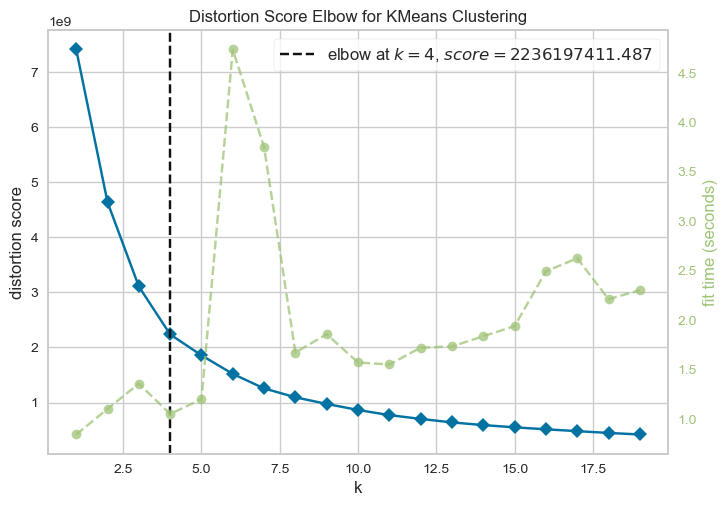

In [21]:
model = kelbow_visualizer(KMeans(), X= rfm_df[['Monetary', 'Recency', 'Frequency']], k=(1,20), show=False)

In [20]:
model

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=19), k=(1, 20))

### Clusterização dos valores modificados

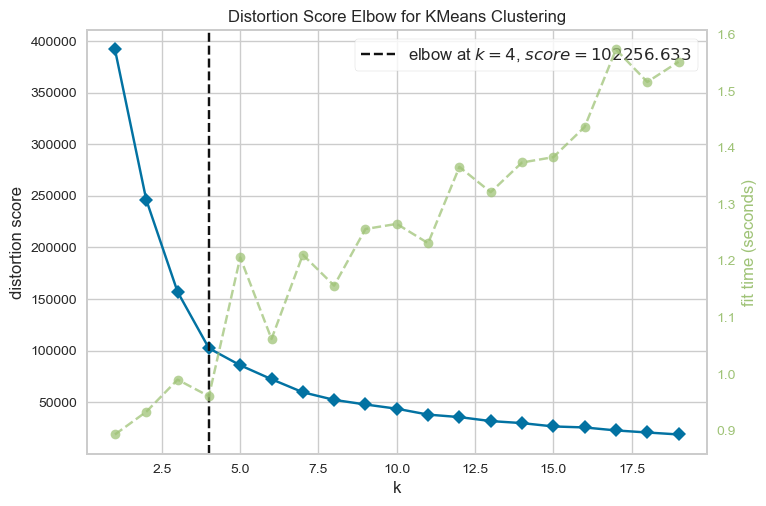

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
kelbow_visualizer(KMeans(), X=rfm_df[['Monetary_test', 'Recency_test', 'Frequency_test']].apply(lambda x: pd.to_numeric(x)), k=(1,20)).draw()

## Escolhendo o melhor modelo

Como posso observar nos gráficos acima e no gráfico de Elbow, o melhor número de clusters é 4 e o melhor modelo é o modelo com os valores modificados. Vou então utilizar o modelo com os valores modificados para criar um novo dataset com os clusters e as notas atribuídas.

In [14]:
## Treinando o modelo

In [15]:
modelo, dados_cluster = train_kmeans(rfm_df[['Monetary_test', 'Recency_test', 'Frequency_test']], 4, have_df_scaled = False)

In [16]:
dados_cluster = dados_cluster.assign(Consumer_unique_id = rfm_df['customer_unique_id'], cluster = lambda x: x.cluster + 1)
dados_cluster.head()

,Monetary_test,Recency_test,Frequency_test,cluster,Consumer_unique_id
0,4,4,1,3,0000366f3b9a7992bf8c76cfdf3221e2
1,1,4,1,3,0000b849f77a49e4a4ce2b2a4ca5be3f
2,2,1,1,2,0000f46a3911fa3c0805444483337064
3,1,2,1,2,0000f6ccb0745a6a4b88665a16c9f078
4,4,2,1,1,0004aac84e0df4da2b147fca70cf8255


In [17]:
normal_cluster_data = cluster_data_transformation(dados_cluster)
normal_cluster_data.head()

,cluster,Consumer_unique_id,type,value
0,1,0000366f3b9a7992bf8c76cfdf3221e2,Monetary_test,4.107685
1,2,0000b849f77a49e4a4ce2b2a4ca5be3f,Monetary_test,1.503902
2,3,0000f46a3911fa3c0805444483337064,Monetary_test,2.990302
3,4,0000f6ccb0745a6a4b88665a16c9f078,Monetary_test,3.623712
4,1,0000366f3b9a7992bf8c76cfdf3221e2,Recency_test,1.879202


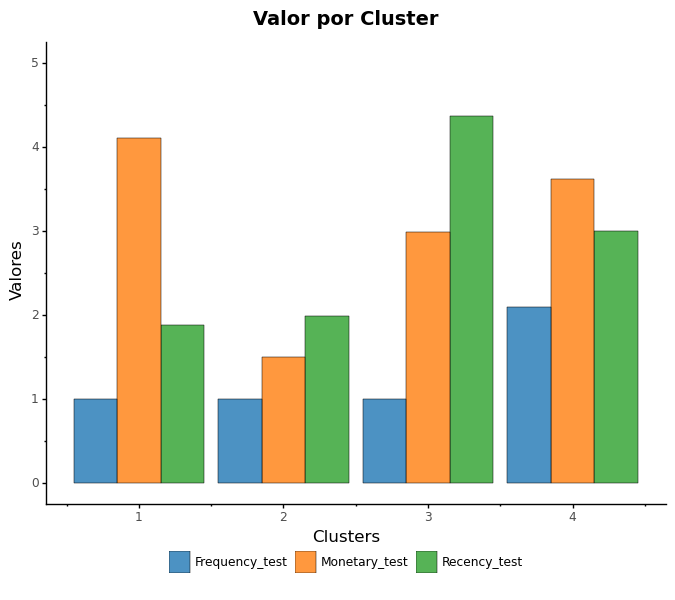

In [37]:
p = (
    ggplot(data=normal_cluster_data) +
    aes(x='cluster', y='value', fill='type') + 
    geom_bar(stat='identity', position='dodge', alpha=0.8, color='black', size=0.2) +
    labs(x='Clusters', y='Valores', title='Valor por Cluster', fill='Tipo') +
    guides(fill=guide_legend(title='')) + 
    scale_fill_manual(values=['#1f77b4', '#ff7f0e', '#2ca02c']) +
    theme_bw() +
    theme(plot_title=element_text(size=14, face='bold', margin={'b': 10}),
       axis_title=element_text(size=12),
       legend_position='bottom',
       legend_title=element_text(size=10, face='bold'),
       panel_grid_major=element_blank(),
       panel_grid_minor=element_blank(),
       panel_border=element_blank(),
       axis_line=element_line(color='black'),
       axis_ticks=element_line(color='black'),
       legend_background=element_blank(),
       legend_key=element_blank(),
       figure_size=(8, 6)) +
    ylim(0, 5)

)

fig, plot = p.draw(return_ggplot=True, show=True)
fig.show()

Pelo jeito, a classificação de 1 a 5 resultou em um melhor processo de classificação. Acredito que isso foi por causa do tratamento da frequencia 

## Resultados do modelo

In [19]:
(
    dados_cluster
    .assign(Monetary_test = lambda x: pd.to_numeric(x.Monetary_test),
            Recency_test = lambda x: pd.to_numeric(x.Recency_test))
    .groupby('cluster')
    .agg({
        'Monetary_test' : 'mean',
        'Recency_test' : 'mean',
        'Frequency_test' : 'mean'
    })
)

,Monetary_test,Recency_test,Frequency_test
cluster,,,
1,4.107685,1.879202,1.000000
2,1.503902,1.990388,1.000000
3,2.990302,4.363194,1.000000
4,3.623712,2.994936,2.098655


Como podemos observar na tabela acima, podemos classificar os clientes em 4 grupos:
- Grupo 1: Clientes que gastaram muito dinheiro, mas que não compraram com frequência e que não compraram recentemente.
- Grupo 2: Clientes que compraram pouco, não compraram recentemente e não compraram com frequência.
- Grupo 3: Clientes que compraram recentemente, mas que não compraram com frequência e que gastaram uma quantia média de dinheiro.
- Grupo 4: Clientes que compraram com frequência, compraram uma quantidade razoável de dinheiro e que compraram relativamente recentemente.

### Distribuição dos clusters

In [20]:
(
    dados_cluster
    .groupby('cluster')
    .agg({'Consumer_unique_id' : 'count'})
    .rename(columns={'Consumer_unique_id' : 'count'})
    .reset_index()
    .apply(lambda x: x if x.name == 'cluster' else (x / x.sum()) * 100)
    .sort_values(by='count', ascending=False)
    
)

,cluster,count
2,3,41.538638
0,1,28.891873
1,2,23.608335
3,4,5.961154


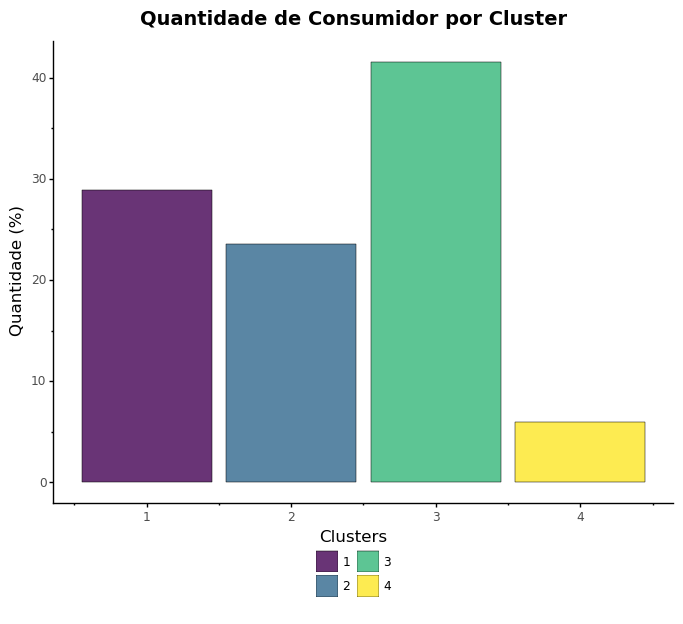

<ggplot: (152815650892)>

In [21]:
(
    ggplot(data=(dados_cluster
                .groupby('cluster')
                .agg({'Consumer_unique_id' : 'count'})
                .rename(columns={'Consumer_unique_id' : 'count'})
                .reset_index()
                .apply(lambda x: x if x.name == 'cluster' else (x / x.sum()) * 100)
                .sort_values(by='count', ascending=False))) +
    aes(x='cluster', y='count', fill='cluster') + 
    geom_bar(stat='identity', position='dodge', alpha=0.8, color='black', size=0.2) +
    labs(x='Clusters', y='Quantidade (%)', title='Quantidade de Consumidor por Cluster') +
    theme_classic() +
    theme(plot_title=element_text(size=14, face='bold', margin={'b': 10}),
       axis_title=element_text(size=12),
       legend_position='bottom',
       legend_title=element_text(size=10, face='bold'),
       panel_grid_major=element_blank(),
       panel_grid_minor=element_blank(),
       panel_border=element_blank(),
       axis_line=element_line(color='black'),
       axis_ticks=element_line(color='black'),
       legend_background=element_blank(),
       legend_key=element_blank(),
       figure_size=(8, 6)) +
 guides(fill=guide_legend(ncol=3, title=''))

)